# 데이터 불러오기

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [4]:
train_df = pd.read_csv('C:/Users/w7e7r/Desktop/스파르타/심화프로젝트/train.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


# boxplot

In [6]:
numeric_col = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

# 제거

In [7]:
import numpy as np

numeric_cols = ['연간소득', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액','부채_대비_소득_비율']

# 표준편차 사용하여 이상치 제거
def remove_outliers(train_df, col, threshold=3):
    mean = np.mean(train_df[col])
    std_dev = np.std(train_df[col])
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev
    train_df= train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]
    return train_df

# 이상치 제거 후 데이터프레임 생성
train_df = train_df.copy()  # 복사본 생성

for col in numeric_cols:
    train_df = remove_outliers(train_df, col, threshold=3)

# 이상치 제거 후 데이터프레임 크기 확인
print("이상치 제거 후 데이터프레임 크기:")
print(train_df)

이상치 제거 후 데이터프레임 크기:
                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  132000000   
96291  TRAIN_96291  14400000   36 months     1 year  MORTGAGE   84000000   
96292  TRAIN_96292  15600000   36 months    5 years  MORTGAGE   66330000   
96293  TRAIN_96293   8640000   36 months  10+ years      RENT   50400000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총

In [8]:
target_column = '대출등급'

X = train_df.drop(columns = [target_column])
y = train_df[[target_column]]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

numeric_col = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']
category_col = ['대출기간', '근로기간', '주택소유상태', '대출목적']

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(63433, 14) (27186, 14) (63433, 1) (27186, 1)


In [9]:
def get_grade(x:str):
    if x == 'A':
        return 6
    elif x == 'B':
        return 5
    elif x == 'C':
        return 4
    elif x == 'D':
        return 3
    elif x == 'E':
        return 2
    elif x == 'F':
        return 1
    elif x == 'G':
        return 0

# y_train 데이터 인코딩 코드
y_train['대출등급'] = y_train['대출등급'].apply(get_grade)
# y_test 데이터 인코딩코드
y_test['대출등급'] = y_test['대출등급'].apply(get_grade)

display(y_test[:10])

,대출등급
43770,5
74933,4
73820,5
60946,4
37074,4
60628,4
20520,5
14832,5
37145,5
54572,4


In [10]:
# Unknown은 5으로 대치
def get_period(x):
    if x in ['< 1 year', '<1 year']:
        return 0
    elif x in ['1 year','1 years']:
        return 1
    elif x == '2 years':
        return 2
    elif x == '3 years':
        return 3
    elif x == '4 years':
        return 4
    elif x==['5 years','Unknown']:
        return 5
    elif x=='6 years':
        return 6
    elif x=='7 years':
        return 7
    elif x=='8 years':
        return 8
    elif x=='9 years':
        return 9
    elif x in ['10+ years', '10+years']:
        return 10
    else:
        return -1
    
train_df['근로기간'] = train_df['근로기간'].apply(lambda x: int(get_period(x)))

In [11]:
train_df['주택소유상태'].value_counts()
# 'ANY'인 값만 출력
train_df[train_df['주택소유상태'] == 'ANY']

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
28730,TRAIN_28730,41160000,36 months,10,ANY,93600000,17.71,20,기타,0,0,0.0,0.0,0.0,C


In [12]:
train_df = train_df.drop(labels=28730, axis=0)
train_df = train_df.reset_index(drop=True)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90618 entries, 0 to 90617
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            90618 non-null  object 
 1   대출금액          90618 non-null  int64  
 2   대출기간          90618 non-null  object 
 3   근로기간          90618 non-null  int64  
 4   주택소유상태        90618 non-null  object 
 5   연간소득          90618 non-null  int64  
 6   부채_대비_소득_비율   90618 non-null  float64
 7   총계좌수          90618 non-null  int64  
 8   대출목적          90618 non-null  object 
 9   최근_2년간_연체_횟수  90618 non-null  int64  
 10  총상환원금         90618 non-null  int64  
 11  총상환이자         90618 non-null  float64
 12  총연체금액         90618 non-null  float64
 13  연체계좌수         90618 non-null  float64
 14  대출등급          90618 non-null  object 
dtypes: float64(4), int64(6), object(5)
memory usage: 10.4+ MB


In [14]:
len(train_df)

90618

# 인코딩, 스케일링

In [15]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['ID', '대출등급'], axis=1)
y = train_df[['대출등급']]

print(X.shape, y.shape)

(90618, 13) (90618, 1)


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y['대출등급'])


y['대출등급'] = le.transform(y['대출등급'])
y

C:\Users\w7e7r\AppData\Local\Temp\ipykernel_17144\339760381.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['대출등급'] = le.transform(y['대출등급'])


,대출등급
0,2
1,1
2,0
3,2
4,1
...,...
90613,2
90614,4
90615,0
90616,3


In [17]:
numeric_col = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '근로기간']
category_col = ['대출기간', '주택소유상태', '대출목적']

In [18]:
def category_encoder(X:pd.DataFrame):
     X_dummies = pd.get_dummies(X[category_col])
     
     X = pd.concat([X, X_dummies], axis=1)
     
     return X, X_dummies.columns.to_list()

X, dummies_col = category_encoder(X)

In [19]:
def numeric_scaler(X):
    
    sc_col = ['최근_2년간_연체_횟수', '총연체금액', '연체계좌수']
    mm_col = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '총상환원금', '총상환이자', '근로기간']
    
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    
    sc = StandardScaler()
    mm = MinMaxScaler()
    
    X[sc_col] = sc.fit_transform(X[sc_col])
    X[mm_col] = mm.fit_transform(X[mm_col])
    
    return X

X = numeric_scaler(X)

In [20]:
train_df1=train_df.copy()

In [21]:
train_df1=train_df1.drop(['ID'],axis=1)

In [22]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90618 entries, 0 to 90617
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          90618 non-null  int64  
 1   대출기간          90618 non-null  object 
 2   근로기간          90618 non-null  int64  
 3   주택소유상태        90618 non-null  object 
 4   연간소득          90618 non-null  int64  
 5   부채_대비_소득_비율   90618 non-null  float64
 6   총계좌수          90618 non-null  int64  
 7   대출목적          90618 non-null  object 
 8   최근_2년간_연체_횟수  90618 non-null  int64  
 9   총상환원금         90618 non-null  int64  
 10  총상환이자         90618 non-null  float64
 11  총연체금액         90618 non-null  float64
 12  연체계좌수         90618 non-null  float64
 13  대출등급          90618 non-null  object 
dtypes: float64(4), int64(6), object(4)
memory usage: 9.7+ MB


# 모델링

## random

### 학습

In [23]:

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [24]:
y_val.value_counts()

대출등급
1       5535
2       5272
0       3226
3       2457
4       1278
5        299
6         57
dtype: int64

In [25]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(random_state=42)
rc.fit(X_train[dummies_col + numeric_col], y_train)

C:\Users\w7e7r\AppData\Local\Temp\ipykernel_17144\690020536.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rc.fit(X_train[dummies_col + numeric_col], y_train)


RandomForestClassifier(random_state=42)

In [26]:
y_pred = rc.predict(X_val[dummies_col + numeric_col])

### 검정

In [27]:
from sklearn.metrics import accuracy_score
y_pred = rc.predict(X_val[dummies_col + numeric_col])
accuracy = accuracy_score(y_val, y_pred)
print("모델 정확도:", accuracy)

모델 정확도: 0.7620834252924299


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
f1 = f1_score(y_val, y_pred, average='macro')
print("F1 Score:", f1)

F1 Score: 0.5834839957495176


## 선형

### 학습

In [55]:

from sklearn.model_selection import train_test_split

X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [56]:
y_val2.value_counts()

대출등급
1       5535
2       5272
0       3226
3       2457
4       1278
5        299
6         57
dtype: int64

In [57]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(X_train2[dummies_col + numeric_col], y_train2)

LinearRegression()

In [58]:
y_pred2 = ln.predict(X_val2[dummies_col + numeric_col])

In [59]:
y_pred2

array([[2.96592331],
       [2.13158989],
       [1.5939045 ],
       ...,
       [1.99005699],
       [2.01434326],
       [4.39136505]])

In [51]:
from sklearn.metrics import mean_squared_error

In [60]:
mse = mean_squared_error(y_val2, y_pred2)
print("Mean Squared Error:", mse)

Mean Squared Error: 198840412466.51987


### 검정

In [61]:
from sklearn.metrics import accuracy_score
y_pred2 = rc.predict(X_val2[dummies_col + numeric_col])
accuracy2 = accuracy_score(y_val2, y_pred2)
print("모델 정확도:", accuracy2)

모델 정확도: 0.7620834252924299


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
f1_ = f1_score(y_val2, y_pred2, average='macro')
print("F1 Score:", f1_)

F1 Score: 0.5834839957495176


# feature_importance

In [32]:
importance = rc.feature_importances_

# 특성 중요도 출력
print("Feature Importance:", importance)

Feature Importance: [1.39941153e-02 1.52098261e-02 7.54306668e-03 5.79299489e-03
 7.14381772e-03 4.16209857e-03 6.94635233e-03 2.07659844e-03
 8.90177137e-03 1.69975724e-03 1.08560059e-03 1.38312651e-03
 1.84960819e-04 2.37015767e-03 8.20749502e-04 4.00145265e-03
 8.55346651e-04 1.01828113e-01 9.23769291e-02 9.90147561e-02
 7.87303207e-02 1.60085379e-02 2.39713834e-01 2.37585739e-01
 0.00000000e+00 1.03745193e-03 4.95325253e-02]


# shape

# 시각화

## 수치형

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# numeric_cols의 비율 계산
numeric_ratios = train_df1[numeric_col].mean() / train_df1[numeric_col]
numeric_ratios

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,근로기간
0,1.421060,1.238961,1.019496,1.640745,inf,inf,inf,inf,inf,0.868003
1,1.231586,0.681997,0.862896,1.171961,inf,2.003364,1.642623,inf,inf,0.520802
2,1.477903,0.929221,2.240520,1.757942,inf,0.805907,2.530355,inf,inf,-5.208016
3,1.231586,0.675797,1.276903,1.640745,inf,2.296948,2.511118,inf,inf,0.651002
4,0.985269,1.243521,0.758900,1.295325,inf,3.274704,2.581113,inf,inf,-5.208016
...,...,...,...,...,...,...,...,...,...,...
90613,1.231586,0.424787,2.065217,0.745793,inf,0.767921,0.781181,inf,inf,0.520802
90614,0.615793,0.675797,3.734200,0.984447,inf,1.282105,0.449631,inf,inf,0.520802
90615,1.231586,1.061967,1.714277,1.118690,inf,0.502577,1.593760,inf,inf,5.208016
90616,1.136848,1.344870,1.113784,1.171961,0.131624,0.542962,0.469971,inf,inf,-5.208016


In [34]:
grade_numeric_ratios = train_df1.groupby('대출등급')[numeric_cols].mean() / train_df1.groupby('대출등급')[numeric_cols].sum()
grade_numeric_ratios

,연간소득,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,부채_대비_소득_비율
대출등급,,,,,,,
A,0.000062,0.000062,0.000062,0.000062,0.000062,NaN,0.000062
B,0.000036,0.000036,0.000036,0.000036,0.000036,NaN,0.000036
C,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038
D,0.000081,0.000081,0.000081,0.000081,0.000081,NaN,0.000081
E,0.000157,0.000157,0.000157,0.000157,0.000157,NaN,0.000157
F,0.000670,0.000670,0.000670,0.000670,0.000670,NaN,0.000670
G,0.003497,0.003497,0.003497,0.003497,0.003497,NaN,0.003497


## 명목형

In [35]:
from scipy.stats import chi2_contingency

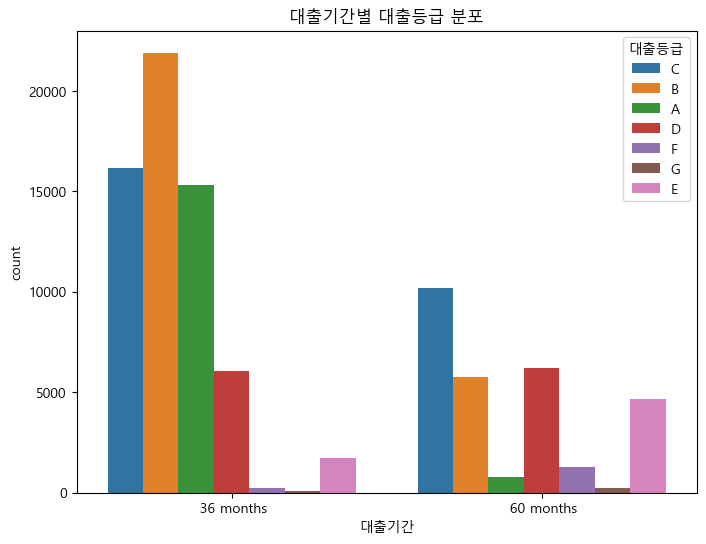

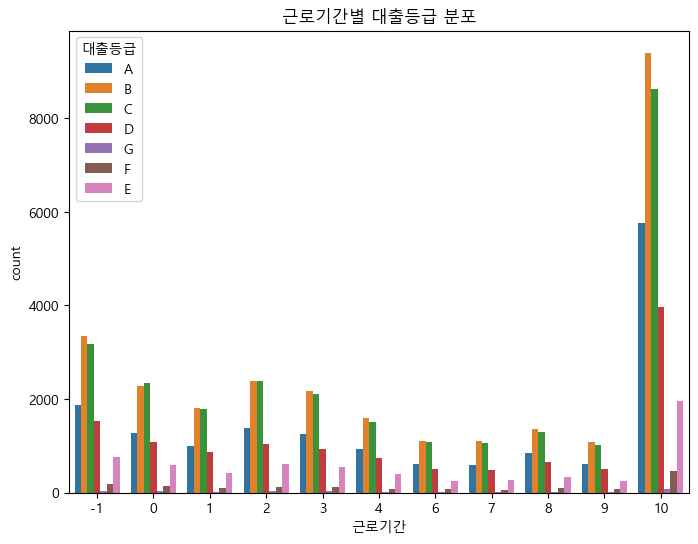

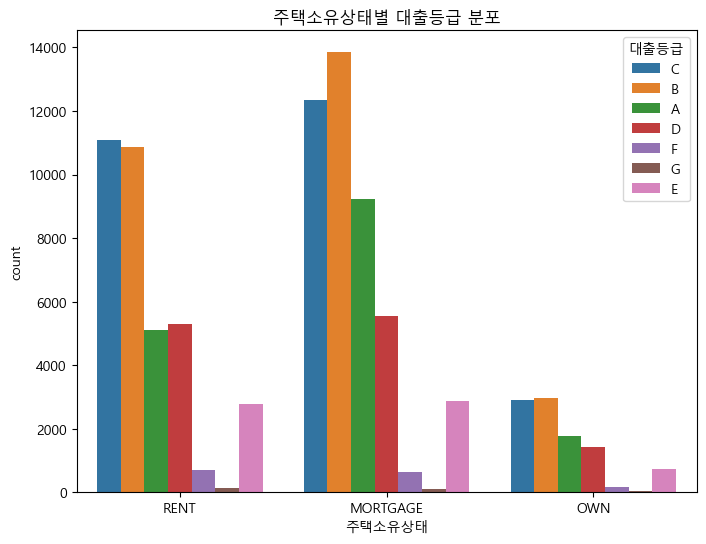

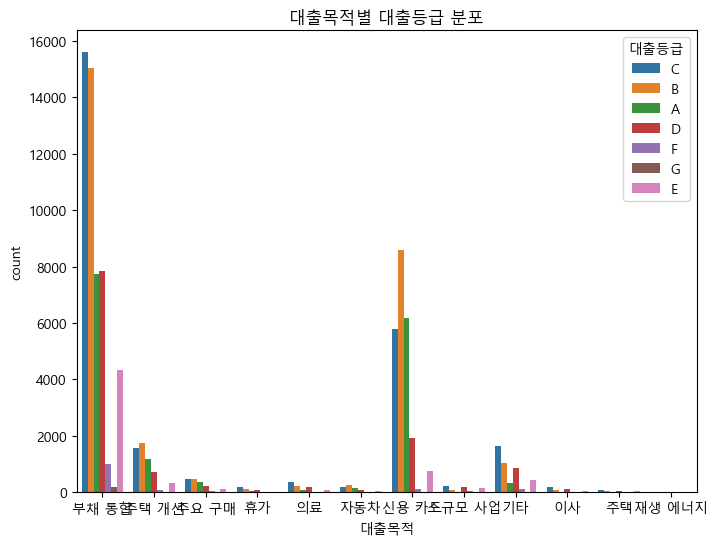

In [36]:
category_col = ['대출기간', '근로기간', '주택소유상태', '대출목적']
for col in category_col:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='대출등급', data=train_df1)
    plt.title(f'{col}별 대출등급 분포')
    plt.show()

In [37]:
for col in category_col:
    contingency_table = pd.crosstab(train_df1[col], train_df1['대출등급'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}과 대출등급 간의 카이제곱 검정 결과:")
    print(f"Chi-square value: {chi2}")
    print(f"P-value: {p}")
    print("---------------------------------------------------")

대출기간과 대출등급 간의 카이제곱 검정 결과:
Chi-square value: 16579.477866640704
P-value: 0.0
---------------------------------------------------
근로기간과 대출등급 간의 카이제곱 검정 결과:
Chi-square value: 137.70791078112464
P-value: 4.7939107390700585e-08
---------------------------------------------------
주택소유상태과 대출등급 간의 카이제곱 검정 결과:
Chi-square value: 718.3418170314637
P-value: 5.217373722489331e-146
---------------------------------------------------
대출목적과 대출등급 간의 카이제곱 검정 결과:
Chi-square value: 5304.49333774313
P-value: 0.0
---------------------------------------------------


In [38]:
# '근로기간' 항목의 각 값에 대한 개수 세기
work_period_counts = train_df1['근로기간'].value_counts()

# 전체 행의 개수
total_rows = len(train_df1)

# 근로기간별 비율 계산
work_period_ratios = work_period_counts / total_rows

# 결과 출력
print("근로기간별 비율:")
print(work_period_ratios)

근로기간별 비율:
 10    0.334117
-1     0.120407
 2     0.087698
 0     0.085105
 3     0.079179
 1     0.065771
 4     0.058134
 8     0.050729
 6     0.040136
 7     0.039584
 9     0.039142
Name: 근로기간, dtype: float64


In [39]:
# 근로기간과 대출등급 간의 그룹화하여 개수 세기
work_period_loan_grade_counts = train_df1.groupby(['근로기간', '대출등급']).size()

# 전체 행의 개수
total_rows = len(train_df1)

# 각 그룹별 비율 계산
work_period_loan_grade_ratios = work_period_loan_grade_counts / total_rows

# 결과 출력
print("근로기간과 대출등급별 비율:")
print(work_period_loan_grade_ratios)

근로기간과 대출등급별 비율:
근로기간  대출등급
-1    A       0.020757
      B       0.037035
      C       0.034993
      D       0.016796
      E       0.008475
                ...   
 10   C       0.095290
      D       0.043876
      E       0.021552
      F       0.005054
      G       0.000938
Length: 77, dtype: float64


In [40]:
work_period_loan_grade_ratios_pivot = work_period_loan_grade_ratios.unstack()

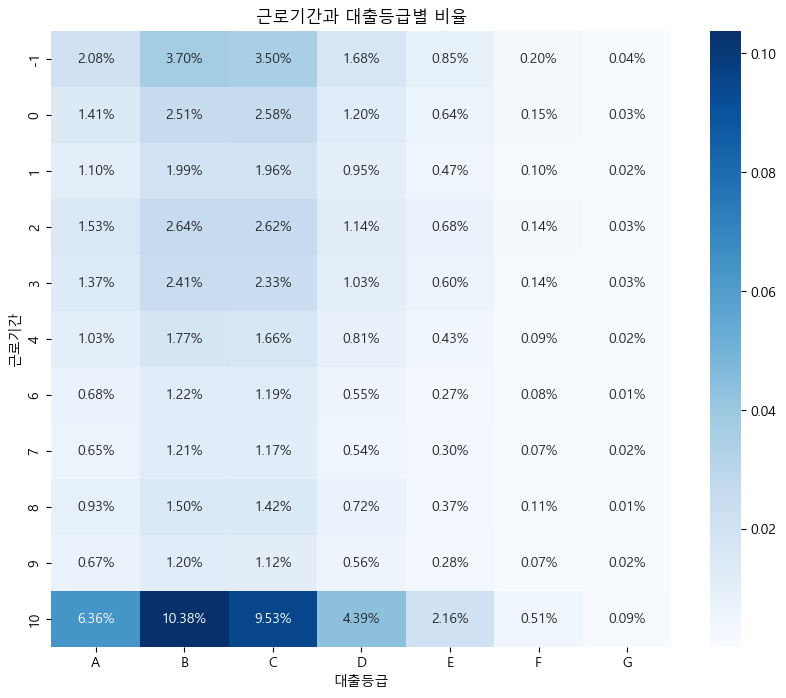

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(work_period_loan_grade_ratios_pivot, annot=True, fmt=".2%", cmap="Blues")
plt.title("근로기간과 대출등급별 비율")
plt.xlabel("대출등급")
plt.ylabel("근로기간")
plt.show()

In [42]:
# 주택소유상태의 각 값에 대한 개수 세기
house_counts = train_df1['주택소유상태'].value_counts()

# 전체 행의 개수
total_rows = len(train_df1)

# 주택소유상태별 비율 계산
house_ratios = house_counts / total_rows

# 결과 출력
print("주택소유상태별 비율:")
print(house_ratios)

주택소유상태별 비율:
MORTGAGE    0.492264
RENT        0.397107
OWN         0.110629
Name: 주택소유상태, dtype: float64


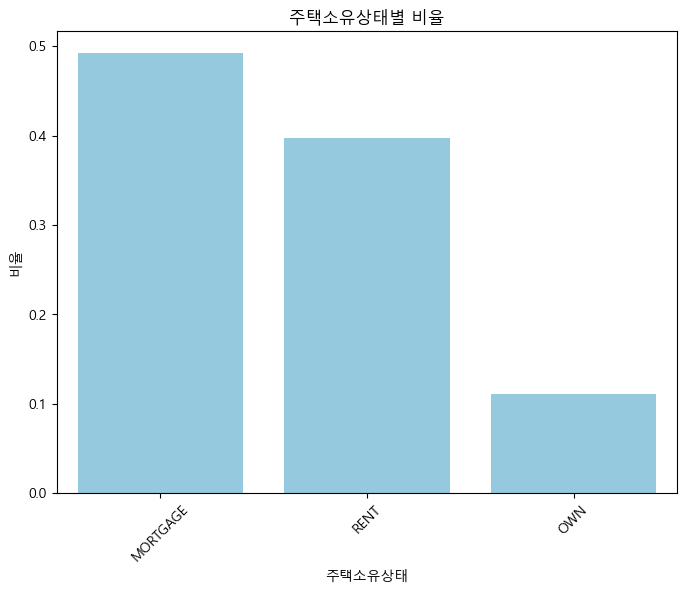

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot(x=house_ratios.index, y=house_ratios.values, color='skyblue')
plt.title("주택소유상태별 비율")
plt.xlabel("주택소유상태")
plt.ylabel("비율")
plt.xticks(rotation=45)  
plt.show()

In [44]:
# 주택소유상태와 대출등급 간의 그룹화하여 개수 세기
house_grade_counts = train_df1.groupby(['주택소유상태', '대출등급']).size()

# 전체 행의 개수
total_rows = len(train_df1)

# 각 그룹별 비율 계산
house_grade_ratios = house_grade_counts / total_rows

# 결과 출력
print("주택소유상태와 대출등급별 비율:")
print(house_grade_ratios)

주택소유상태와 대출등급별 비율:
주택소유상태    대출등급
MORTGAGE  A       0.101900
          B       0.152740
          C       0.136375
          D       0.061235
          E       0.031760
          F       0.007030
          G       0.001225
OWN       A       0.019698
          B       0.032643
          C       0.032014
          D       0.015935
          E       0.008166
          F       0.001766
          G       0.000408
RENT      A       0.056424
          B       0.120009
          C       0.122470
          D       0.058421
          E       0.030579
          F       0.007681
          G       0.001523
dtype: float64


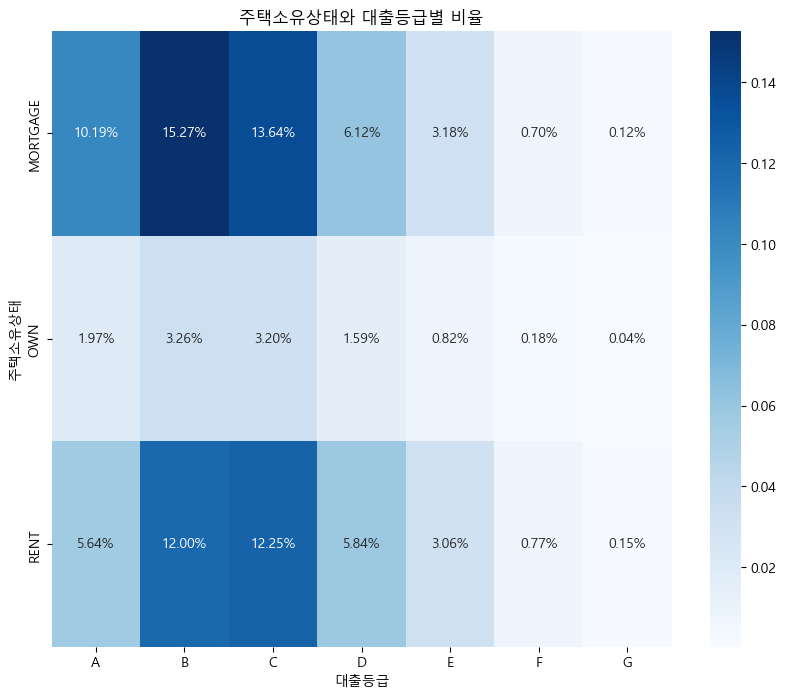

In [45]:
# 데이터프레임을 피벗하여 heatmap을 그리기 위한 형태로 변환
house_grade_ratios_pivot = house_grade_ratios.unstack()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(house_grade_ratios_pivot, annot=True, fmt=".2%", cmap="Blues")
plt.title("주택소유상태와 대출등급별 비율")
plt.xlabel("대출등급")
plt.ylabel("주택소유상태")
plt.show()

In [46]:
# 대출목적별 각 값에 대한 개수 세기
loan_counts = train_df1['대출목적'].value_counts()

# 전체 행의 개수
total_rows = len(train_df1)

# 대출목적별 비율 계산
loan_ratios = loan_counts / total_rows

# 결과 출력
print("대출목적별 비율:")
print(loan_ratios)

대출목적별 비율:
부채 통합     0.570494
신용 카드     0.257785
주택 개선     0.062802
기타        0.049196
주요 구매     0.018595
의료        0.010958
자동차       0.008321
소규모 사업    0.007979
이사        0.005286
휴가        0.004999
주택        0.002946
재생 에너지    0.000640
Name: 대출목적, dtype: float64


C:\Users\w7e7r\AppData\Local\Temp\ipykernel_17144\1824328578.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_ratios.index, y=loan_ratios.values, palette='Blues')


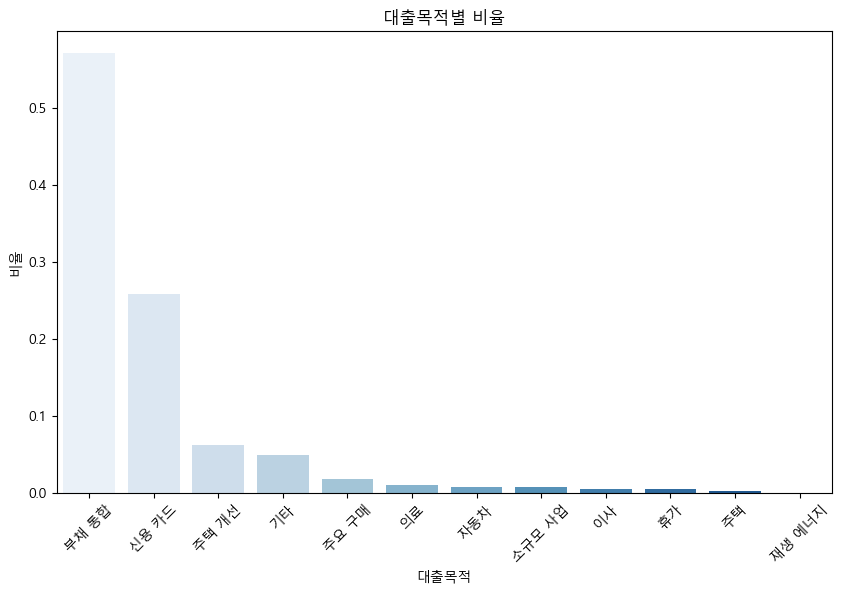

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x=loan_ratios.index, y=loan_ratios.values, palette='Blues')
plt.title("대출목적별 비율")
plt.xlabel("대출목적")
plt.ylabel("비율")
plt.xticks(rotation=45)  # x축 눈금 라벨 회전
plt.show()

In [48]:
# 대출목적과 대출등급 간의 그룹화하여 개수 세기
purpose_loan_grade_counts = train_df1.groupby(['대출목적', '대출등급']).size()

# 전체 행의 개수
total_rows = len(train_df1)

# 각 그룹별 비율 계산
purpose_loan_grade_ratios = purpose_loan_grade_counts / total_rows

# 결과 출력
print("대출목적과 대출등급별 비율:")
print(purpose_loan_grade_ratios)

대출목적과 대출등급별 비율:
대출목적  대출등급
기타    A       0.003752
      B       0.011510
      C       0.018043
      D       0.009501
      E       0.004690
                ...   
휴가    B       0.001291
      C       0.002141
      D       0.000817
      E       0.000276
      F       0.000033
Length: 82, dtype: float64


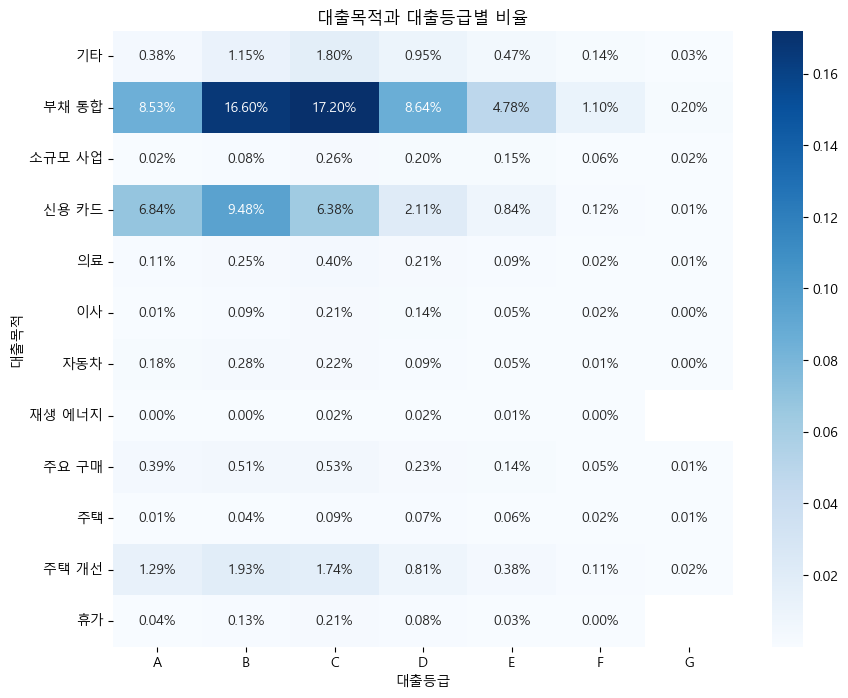

In [49]:
purpose_loan_grade_ratios_pivot = purpose_loan_grade_ratios.unstack()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(purpose_loan_grade_ratios_pivot, annot=True, fmt=".2%", cmap="Blues")
plt.title("대출목적과 대출등급별 비율")
plt.xlabel("대출등급")
plt.ylabel("대출목적")
plt.show()